In [ ]:
# Monty Hall Simulation by Zain Nasrullah

In [1]:
# Random Data Generation Example
# The code in this cell describes how I'm generating and playing the game show scenario

import pandas as pd
import random

df = pd.DataFrame([1,2,3], columns = ["Door"])
df["Reward"] = random.sample(["Goat","Goat", "Car"], 3)

# Randomly selecting a door
SelectionDoor = random.randint(1,3)

# Randomly revealing a door with a goat
GoatDoor = int(df[(df["Reward"]=="Goat") & (df["Door"] != SelectionDoor)]["Door"].sample(n=1))

# Assigning the remaining door
RemainingDoor = int(df[(df["Door"]!= GoatDoor) & (df["Door"] != SelectionDoor)]["Door"])

print("Selected Door:", SelectionDoor)
print("Revealed Door:", GoatDoor)
print("Remaining Door:", RemainingDoor)
df

Selected Door: 1
Revealed Door: 3
Remaining Door: 2


,Door,Reward
0,1,Car
1,2,Goat
2,3,Goat


In [2]:
# Simulation over 1000 trials

n = 1000
good_switch = []

for i in range (n):
    
    # Random Data Generation as shown in the example cell
    df = pd.DataFrame([1,2,3], columns = ["Door"])
    df["Reward"] = random.sample(["Goat","Goat", "Car"], 3)
    
    # Randomly selecting a door, revealing a goat door and then identifying the remaining door as shown in the example cell
    SelectionDoor = random.randint(1,3)
    GoatDoor = int(df[(df["Reward"]=="Goat") & (df["Door"] != SelectionDoor)]["Door"].sample(n=1))
    RemainingDoor = int(df[(df["Door"]!= GoatDoor) & (df["Door"] != SelectionDoor)]["Door"])

    # Comparison of whether a switch would yield a good result
    if df.loc[df["Door"] == RemainingDoor]["Reward"].values[0] == "Car":
        # A switch would have yielded positive results
        good_switch.append([i,"Yes"])
    else:
        # A switch would have yielded negative results
        good_switch.append([i,"No"])

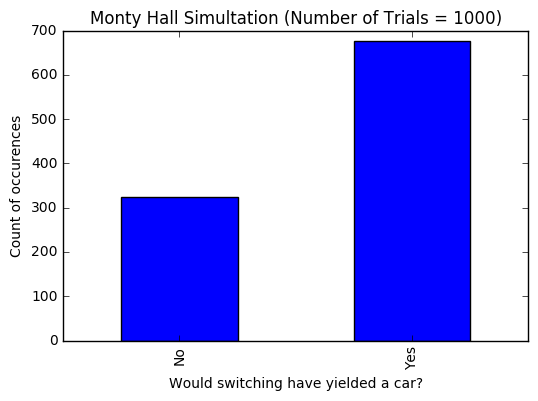

In [5]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the result
dfResults = pd.DataFrame(data = good_switch, columns = ["Trial", "Switch would have yielded car"])
dfResults.groupby("Switch would have yielded car").count().plot(kind='bar', legend = False)
plt.ylabel("Count of occurences")
plt.xlabel("Would switching have yielded a car?")
plt.title("Monty Hall Simultation (Number of Trials = 1000)")

# From the visualization above, we see that when a contestant is asked whether he or she would like to switch doors, the switch would have yielded a car approximately twice as often as not switching.